In [1]:
import numpy as np
import matplotlib.pyplot as plt

Q1


a)


In [2]:
def norm_ball(p):
    x = np.linspace(-1, 1, 500)
    y = (1 - np.abs(x)**p)**(1/p)
    plt.figure()
    plt.title(f'p={p}')
    plt.plot(x, y, color='blue') # upper half
    plt.plot(x, -y, color='blue') # lower half
    plt.show()

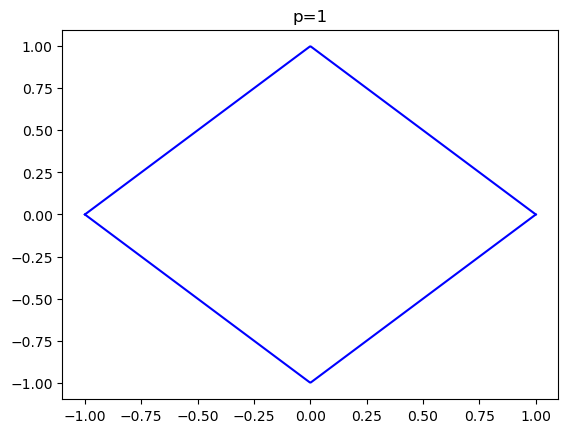

In [3]:
norm_ball(1)

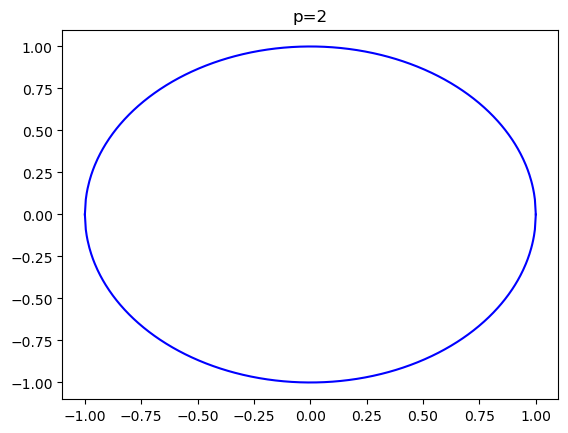

In [4]:
norm_ball(2)

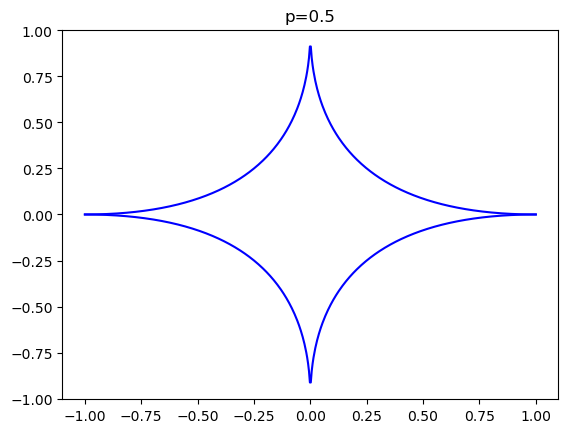

In [5]:
norm_ball(0.5)

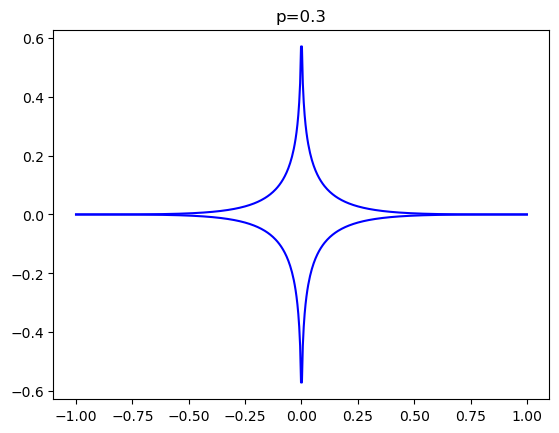

In [6]:
norm_ball(0.3)

b)


A set is convex if, for any two points inside the set, the line segment connecting them lies entirely within the set.

For $p \ge 1$, the above statement holds true for the shape in the image, indicating that the shape is convex.

For $0 < p < 1$, the shape in the image, which resembles a star or a diamond-like figure, clearly has regions where this property does not hold. For instance, if we choose two points near the "tips" of the figure (at the ends of the horizontal or vertical axes), the line segment connecting them would pass outside the shape, indicating that the shape is not convex.


<br>
Q2

Consider the sequence of functions ${f_n(x)}$ defined on $[0,1]$ by:  
$f_n(x) = \begin{cases} nx & \text{if } 0 \le x \le \frac{1}{n} \\ 1 & \text{if } \frac{1}{n} < x \le 1 \end{cases}$  

Each function $f_n(x)$ is continuous on $[0,1]$, but the pointwise limit of the sequence is not continuous at $x=0$. To see this, consider the limit of $f_n(x)$ as $n$ approaches infinity. For $x=0$, the limit is $0$, but for $x>0$, the limit is $1$.  

$f(x) = \begin{cases} 0 & \text{if } x = 0 \\ 1 & \text{if } 0 < x \le 1 \end{cases}$  

Hence, $C[0,1]$ is not complete with respect to the $L^1$ norm.

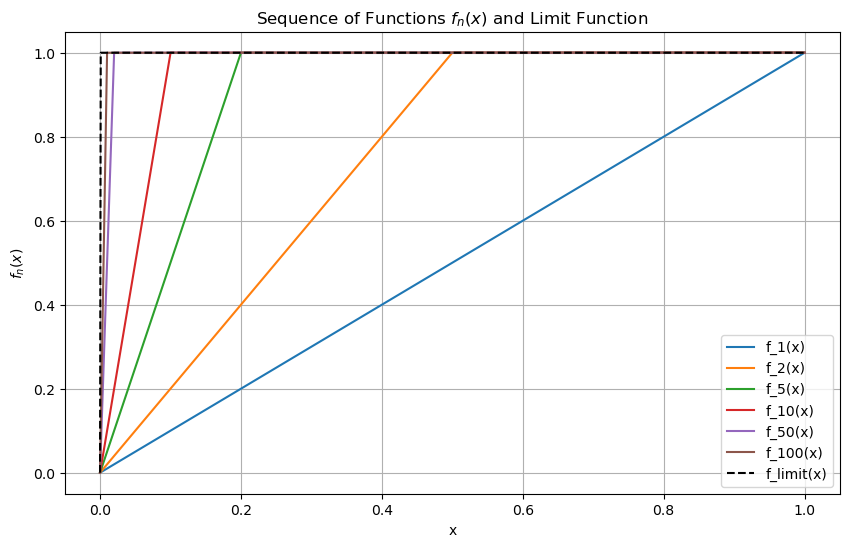

L1 norm distance between f_1(x) and f_limit(x): 0.49949949949949946
L1 norm distance between f_2(x) and f_limit(x): 0.24949975000025051
L1 norm distance between f_5(x) and f_limit(x): 0.0994999003007011
L1 norm distance between f_10(x) and f_limit(x): 0.04949995040085131
L1 norm distance between f_50(x) and f_limit(x): 0.009499990480971462
L1 norm distance between f_100(x) and f_limit(x): 0.004499995490986482
L1 norm distance between f_500(x) and f_limit(x): 0.0004999994989984979
L1 norm distance between f_1000(x) and f_limit(x): 0.0


In [7]:
# The sequence of functions f_n(x)
def f_n(x, n):
    return np.where(x <= 1/n, n*x, 1)

# The limit function f(x)
def f_limit(x):
    return np.where(x == 0, 0, 1)

x_values = np.linspace(0, 1, 1000)

# Plot several functions in the sequence f_n(x)
plt.figure(figsize=(10, 6))
for n in [1, 2, 5, 10, 50, 100]:
    plt.plot(x_values, f_n(x_values, n), label=f'f_{n}(x)')

# Plot the limit function
plt.plot(x_values, f_limit(x_values), 'k--', label='f_limit(x)')

plt.title('Sequence of Functions $f_n(x)$ and Limit Function')
plt.xlabel('x')
plt.ylabel('$f_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Compute the L1 norm distance between f_n(x) and f_limit(x) for large n
n_values = [1, 2, 5, 10, 50, 100, 500, 1000]
distances = []

for n in n_values:
    f_n_values = f_n(x_values, n)
    f_limit_values = f_limit(x_values)
    # Compute the L1 norm distance
    distance = np.trapz(np.abs(f_n_values - f_limit_values), x_values)
    distances.append(distance)

# Print the L1 norm distances
for n, dist in zip(n_values, distances):
    print(f"L1 norm distance between f_{n}(x) and f_limit(x): {dist}")


The above plot shows the functions $f_n(x)$ approaching the limiting function $f(x)$ as $n$ increases, illustrating that the sequence is a Cauchy sequence. However, the limiting function $f(x)$ is not continuous at $x=0$, indicating that $C[0,1]$ is not complete with respect to the $L^1$ norm.

Q3

a)


In [8]:
def entropy(pmf):
    # Check if any probability is zero and exclude it from the calculation
    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]
    
    # Calculate entropy
    entropy_value = 0
    for p in pmf:
        entropy_value -= p * np.log2(p)
    return entropy_value

In [9]:
pmf_1 = [0.5, 0.25, 0.125, 0.125]
print(f"Entropy: {entropy(pmf_1)} bits")

Entropy: 1.75 bits


In [10]:
pmf_2 = [0.25, 0.25, 0.25, 0.25]
print(f"Entropy: {entropy(pmf_2)} bits")

Entropy: 2.0 bits


b)


In [11]:
def bern_entropy(p):
    return entropy([p, 1-p])

def plot_bern_entropy():
    p = np.arange(0, 1, 0.001)
    entropy_values = [bern_entropy(p_) for p_ in p]
    plt.figure()
    plt.plot(p, entropy_values)
    plt.xlabel('p')
    plt.ylabel('Entropy (bits)')
    plt.title('Bernoulli Entropy')
    plt.show()
    # return p with maximum entropy and the maximum entropy value
    return p[np.argmax(entropy_values)], np.max(entropy_values)

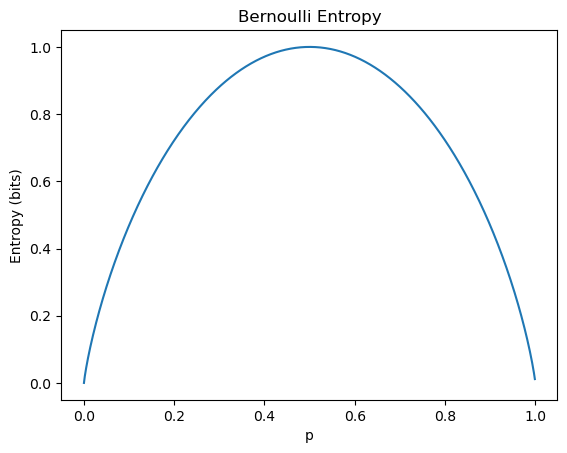

In [12]:
max_entropy_p, max_entropy = plot_bern_entropy()

In [13]:
print(f"Maximum entropy is achieved at p={max_entropy_p} with entropy={max_entropy} bits")

Maximum entropy is achieved at p=0.5 with entropy=1.0 bits


<br>
Q4

$H(Y|X) = -E_{(x,y) \sim p(x,y)}[log(p(Y|X))]$  

$=> H(Y|X) = -\sum_{x \in X} p_{X}(x) \sum_{y \in Y} p_{Y|X}(Y=y|X=x) log(p(Y=y|X=x))$  
<br><br>
$H(X) = -E_{x \sim p(x)}[log(p(X))]$  

$=> H(X) = -\sum_{x \in X} p_{X}(x) log(p(X=x))$  
<br><br>
Now, 

$H(X,Y) = -E_{(x,y) \sim p(x,y)}[log(p(X,Y))]$  

$=> H(X,Y) = -\sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(X=x,Y=y))$  
<br>  

Also, $p(X,Y) = p(Y|X) * p(X)$  
<br>  

$=> H(X,Y) = -\sum_{x \in X} \sum_{y \in Y} p_{Y|X}(Y=y|X=x) * p_{X}(x) log(p_{Y|X}(Y=y|X=x) * p_{X}(x))$  

$=> H(X,Y) = -\sum_{x \in X} \sum_{y \in Y} p_{Y|X}(Y=y|X=x) * p_{X}(x) log(p_{Y|X}(Y=y|X=x)) - \sum_{x \in X} \sum_{y \in Y} p_{Y|X}(Y=y|X=x) * p_{X}(x) log(p_{X}(x))$  

$=> H(X,Y) = -\sum_{x \in X} p_{X}(x) \sum_{y \in Y} p_{Y|X}(Y=y|X=x) log(p_{Y|X}(Y=y|X=x)) - \sum_{x \in X} p_{X}(x) log(p_{X}(x))\sum_{y \in Y} p_{Y|X}(Y=y|X=x)$  
<br>  

Now, $\sum_{y \in Y} p_{Y|X}(Y=y|X=x) = 1$  
<br>  
$=> H(X,Y) = -\sum_{x \in X} p_{X}(x) \sum_{y \in Y} p_{Y|X}(Y=y|X=x) log(p_{Y|X}(Y=y|X=x)) - \sum_{x \in X} p_{X}(x) log(p_{X}(x))$  
<br>
Substituting the values of $H(X)$ and $H(Y|X)$ in the above equation, we get  

$H(X,Y) = H(Y|X) + H(X)$

<br><br>
Q5

$H(X,Y) = -E_{(x,y) \sim p(x,y)}[log(p(X,Y))]$  

$=> H(X,Y) = -\sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(X=x,Y=y))$
<br><br>  
$H(X) = -E_{x \sim p(x)}[log(p(X))]$  

$=> H(X) = -\sum_{x \in X} p_{X}(x) log(p(X=x))$  
<br><br>
$H(Y) = -E_{y \sim p(y)}[log(p(Y))]$  

$=> H(Y) = -\sum_{y \in Y} p_{Y}(y) log(p(Y=y))$
<br><br>  
Now,  
$I(X;Y) = E_{(x,y) \sim p(x,y)}[log(\frac{p(X,Y)}{p(X)p(Y)})]$  

$=> I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(\frac{p_{X,Y}(x,y)}{p_{X}(x)p_{Y}(y)})$  

$=> I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(x,y)) - \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X}(x)) - \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{Y}(y))$  

Now, $p_{X,Y}(x,y) = p_{Y|X}(y|x) * p_{X}(x) = p_{X|Y}(x|y) * p_{Y}(y)$  

$=> I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(x,y)) - \sum_{x \in X} \sum_{y \in Y} p_{Y|X}(y|x) * p_{X}(x) log(p_{X}(x)) - \sum_{y \in Y} \sum_{x \in X} p_{X|Y}(x|y) * p_{Y}(y) log(p_{Y}(y))$  

$=> I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(x,y)) - \sum_{x \in X} p_{X}(x) log(p_{X}(x)) \sum_{y \in Y} p_{Y|X}(y|x) - \sum_{y \in Y} p_{Y}(y) log(p_{Y}(y)) \sum_{x \in X} p_{X|Y}(x|y)$  

Now, $\sum_{y \in Y} p_{Y|X}(y|x) = 1$ and $\sum_{x \in X} p_{X|Y}(x|y) = 1$ 

$=> I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X,Y}(x,y)) - \sum_{x \in X} p_{X}(x) log(p_{X}(x)) - \sum_{y \in Y} p_{Y}(y) log(p_{Y}(y))$  

$=> I(X;Y) = -H(X,Y) + H(X) + H(Y)$  

From previous question, we know that $H(X,Y) = H(Y|X) + H(X) = H(X|Y) + H(Y)$  

$=> I(X;Y) = -H(X|Y) - H(Y) + H(X) + H(Y)$  

$=> I(X;Y) = H(X) - H(X|Y)$ 

Similarly, 

$=> I(X;Y) = -H(Y|X) - H(X) + H(Y) + H(X)$  

$=> I(X;Y) = H(Y) - H(Y|X)$

<br><br>
Q6

$p(x=0, y=0) = \frac{1}{3}$  
$p(x=0, y=1) = \frac{1}{3}$  
$p(x=1, y=1) = \frac{1}{3}$  
$p(x=1, y=0) = 0$

a)  
<br>
$H(X) = -\sum_{x \in X} p_{X}(x) log(p(X=x))$  
<br>
$p_{X}(0) = p(x=0, y=0) + p(x=0, y=1) = \frac{1}{3} + \frac{1}{3} = \frac{2}{3}$  
$p_{X}(1) = p(x=1, y=0) + p(x=1, y=1) = 0 + \frac{1}{3} = \frac{1}{3}$  
<br>
$=> H(X) = -\frac{2}{3} log(\frac{2}{3}) - \frac{1}{3} log(\frac{1}{3})$  
$=> H(X) = log(3) - \frac{2}{3}$
<br>  
$H(Y) = -\sum_{y \in Y} p_{Y}(y) log(p(Y=y))$  
<br>
$p_{Y}(0) = p(x=0, y=0) + p(x=1, y=0) = \frac{1}{3} + 0 = \frac{1}{3}$  
$p_{Y}(1) = p(x=0, y=1) + p(x=1, y=1) = \frac{1}{3} + \frac{1}{3} = \frac{2}{3}$  
<br>
$=> H(Y) = -\frac{1}{3} log(\frac{1}{3}) - \frac{2}{3} log(\frac{2}{3})$  
$=> H(Y) = log(3) - \frac{2}{3}$

b)  
<br>
$H(X|Y) = -\sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{X|Y}(X=x|Y=y))$  
<br>
$p_{X|Y}(0|0) = \frac{p(x=0, y=0)}{p(y=0)} = \frac{\frac{1}{3}}{\frac{1}{3}} = 1$  
$p_{X|Y}(1|0) = \frac{p(x=1, y=0)}{p(y=0)} = \frac{0}{\frac{1}{3}} = 0$  
$p_{X|Y}(0|1) = \frac{p(x=0, y=1)}{p(y=1)} = \frac{\frac{1}{3}}{\frac{2}{3}} = \frac{1}{2}$  
$p_{X|Y}(1|1) = \frac{p(x=1, y=1)}{p(y=1)} = \frac{\frac{1}{3}}{\frac{2}{3}} = \frac{1}{2}$  
<br>
$=> H(X|Y) = -(\frac{1}{3} * log(1) + 0 * log(0) + \frac{1}{3} * log(\frac{1}{2}) + \frac{1}{3} * log(\frac{1}{2}))$  
$=> H(X|Y) = \frac{2}{3}$  
<br><br>
$H(Y|X) = -\sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) log(p_{Y|X}(Y=y|X=x))$  
<br>
$p_{Y|X}(0|0) = \frac{p(x=0, y=0)}{p(x=0)} = \frac{\frac{1}{3}}{\frac{2}{3}} = \frac{1}{2}$  
$p_{Y|X}(1|0) = \frac{p(x=0, y=1)}{p(x=0)} = \frac{\frac{1}{3}}{\frac{2}{3}} = \frac{1}{2}$  
$p_{Y|X}(0|1) = \frac{p(x=1, y=0)}{p(x=1)} = \frac{0}{\frac{1}{3}} = 0$  
$p_{Y|X}(1|1) = \frac{p(x=1, y=1)}{p(x=1)} = \frac{\frac{1}{3}}{\frac{1}{3}} = 1$  
<br>  
$=> H(Y|X) = -(\frac{1}{3} * log(\frac{1}{2}) + \frac{1}{3} * log(\frac{1}{2}) + 0 * log(0) + \frac{1}{3} * log(1))$  
$=> H(Y|X) = \frac{2}{3}$

c)  
<br>
$H(X,Y) = H(X) + H(Y|X)$  
$=> H(X,Y) = log(3) - \frac{2}{3} + \frac{2}{3}$  
$=> H(X,Y) = log(3)$

d)  
<br>
$H(Y) - H(Y|X) = log(3) - \frac{2}{3} - \frac{2}{3}$  
$=> H(Y) - H(Y|X) = log(3) - \frac{4}{3}$

e)  
<br>
$I(X;Y) = H(Y) - H(Y|X)$  
$=> I(X;Y) = log(3) - \frac{4}{3}$

<br><br>
Q7

a)

In [14]:
def normalized_hist(img):
    n = img.shape[0] * img.shape[1]
    bins = {}
    # Count the number of occurrences of each pixel value
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] not in bins:
                bins[img[i, j]] = 1
            else:
                bins[img[i, j]] += 1
    # Normalize the histogram
    for key in bins:
        bins[key] /= n
    return bins

In [15]:
def load_image(filename):
    img = plt.imread(filename)
    return img

In [16]:
def plot_hist(hist):
    plt.figure()
    plt.bar(hist.keys(), hist.values())
    plt.xlabel('Pixel value')
    plt.ylabel('Normalized frequency')
    plt.title('Histogram')
    plt.show()

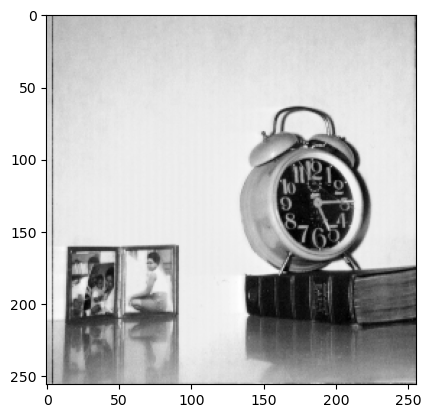

In [17]:
img = load_image('5.1.12.tiff')
plt.imshow(img, cmap='gray')

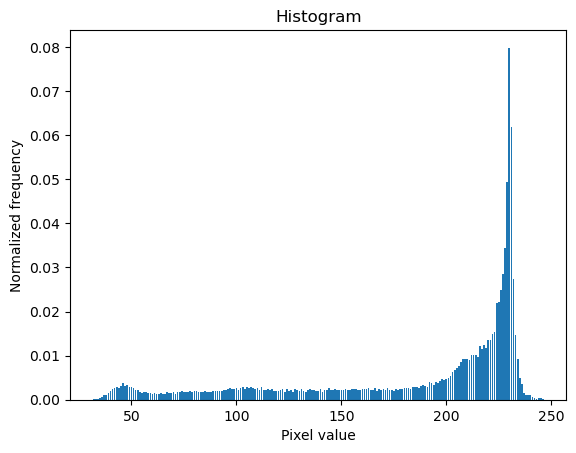

In [18]:
norm_hist = normalized_hist(img)
plot_hist(norm_hist)

b)

In [19]:
entropy_value = entropy(list(norm_hist.values()))
print(f"Entropy: {entropy_value}")

Entropy: 6.705667200666731


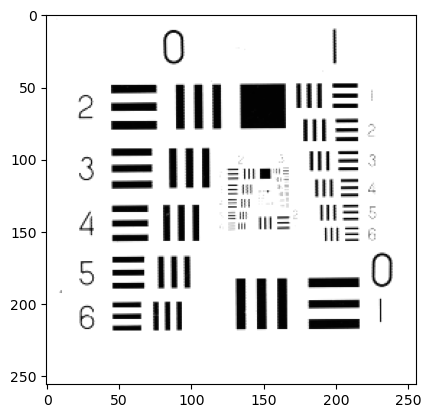

In [20]:
img = load_image('5.1.13.tiff')
plt.imshow(img, cmap='gray')

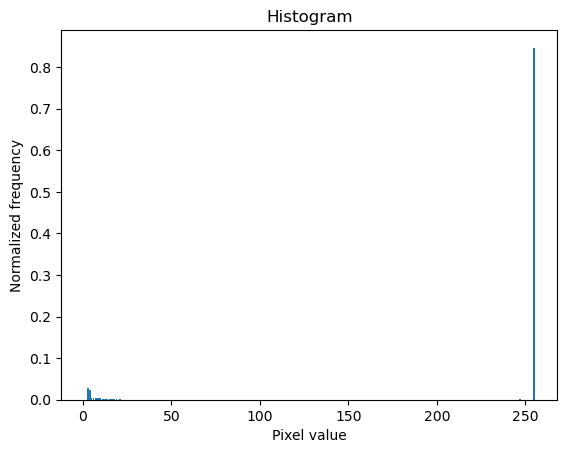

In [21]:
norm_hist = normalized_hist(img)
plot_hist(norm_hist)

In [22]:
entropy_value = entropy(list(norm_hist.values()))
print(f"Entropy: {entropy_value}")

Entropy: 1.5483136966538136


For the clock image, the entropy is higher as the pixels are more spread out and the probability of each pixel is more uniform.  
In case of the resolution image, the entropy is lower as the pixels are more concentrated around white and black.

<br>
Q8

a)

In [23]:
def normalized_joint_histogram(img1, img2):
    n = img1.shape[0] * img1.shape[1]
    bins = {}
    # Count the number of occurrences of each pixel value
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if (img1[i, j], img2[i, j]) not in bins:
                bins[(img1[i, j], img2[i, j])] = 1
            else:
                bins[(img1[i, j], img2[i, j])] += 1
    # Normalize the histogram
    for key in bins:
        bins[key] /= n
    
    # plot the joint histogram
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [key[0] for key in bins]
    y = [key[1] for key in bins]
    z = list(bins.values())
    ax.bar3d(x, y, np.zeros_like(z), 1, 1, z)
    plt.xlabel('Pixel value in image 1')
    plt.ylabel('Pixel value in image 2')
    plt.title('Joint Histogram')
    plt.show()
    
    return bins

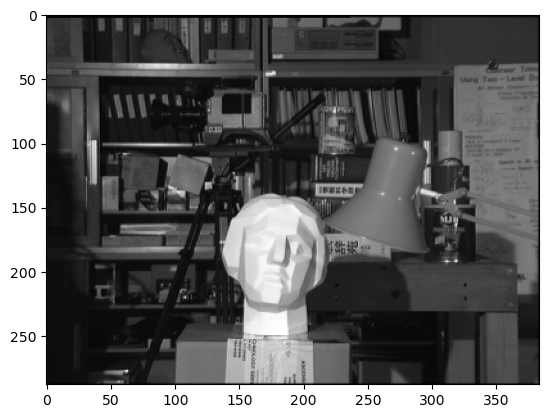

In [24]:
img1 = load_image('left.png')
plt.imshow(img1, cmap='gray')

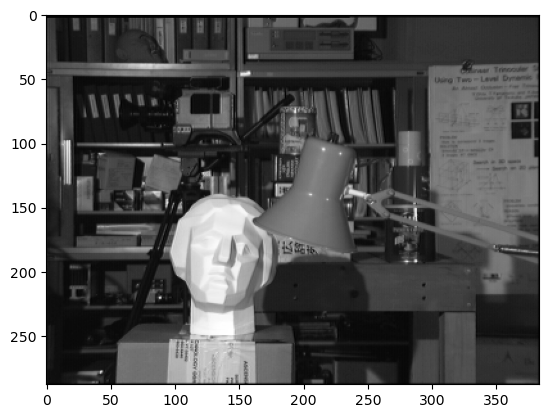

In [25]:
img2 = load_image('right.png')
plt.imshow(img2, cmap='gray')

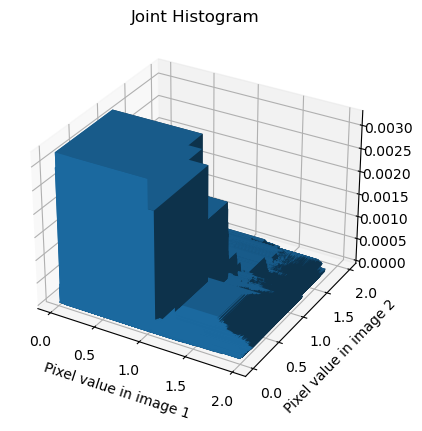

In [26]:
joint_hist = normalized_joint_histogram(img1, img2)

b)

In [27]:
def entropy(pmf):
    # Check if any probability is zero and exclude it from the calculation
    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]
    
    # Calculate entropy
    entropy_value = 0
    for p in pmf:
        entropy_value -= p * np.log2(p)
    return entropy_value

def joint_entropy(joint_hist):
    # Since the joint histogram is a pmf for (x, y) pairs, we can directly calculate the entropy
    return entropy(list(joint_hist.values()))

c)

In [28]:
joint_entropy_value = joint_entropy(joint_hist)
print(f"Joint entropy: {joint_entropy_value}")

Joint entropy: 13.675203263374575


<br>
Q9

In [29]:
def marginal_pmf(joint_pmf, index):
    """
    index = 0: calculate p(x)
    index = 1: calculate p(y)
    """

    marginal_pmf = {}
    for key in joint_pmf:
        if index == 0:
            if key[0] not in marginal_pmf:
                marginal_pmf[key[0]] = joint_pmf[key]
            else:
                marginal_pmf[key[0]] += joint_pmf[key]
        else:
            if key[1] not in marginal_pmf:
                marginal_pmf[key[1]] = joint_pmf[key]
            else:
                marginal_pmf[key[1]] += joint_pmf[key]
    
    return marginal_pmf

def conditional_pmf(joint_pmf, index, value):
    """
    index = 0: calculate p(y|x)
    index = 1: calculate p(x|y)
    value: the value of x or y
    """

    # Calculate the marginal pmf
    marginal = marginal_pmf(joint_pmf, index)
    
    if value not in marginal:
        return None

    # Calculate the conditional pmf
    conditional_pmf = {}
    for key in joint_pmf:
        if index == 0:
            if key[0] == value:
                conditional_pmf[key[1]] = joint_pmf[key] / marginal[value]
        else:
            if key[1] == value:
                conditional_pmf[key[0]] = joint_pmf[key] / marginal[value]
    
    return conditional_pmf

In [30]:
con_pmf = conditional_pmf(joint_hist, 0, 0)

In [31]:
con_pmf

{0.039215688: 0.05882352941176471,
 0.4627451: 0.05882352941176471,
 0.07450981: 0.17647058823529413,
 0.09019608: 0.17647058823529413,
 0.08235294: 0.17647058823529413,
 0.09411765: 0.17647058823529413,
 0.08627451: 0.05882352941176471,
 0.09803922: 0.05882352941176471,
 0.07058824: 0.05882352941176471}

In [32]:
# To check if the conditional pmf is correct, we can calculate the sum of the probabilities
p = 0
for key in con_pmf:
    p+=con_pmf[key]
p

1.0

b)

In [33]:
def conditional_entropy(joint_hist, index):
    # Calculate the conditional pmf for all possible values of x or y
    condition_variable_values = {}
    # get all possible values of x or y
    for key in joint_hist:
        if index == 0:
            condition_variable_values[key[0]] = 1
        else:
            condition_variable_values[key[1]] = 1
    
    # Calculate the marginal pmf
    marginal_pmf_ = marginal_pmf(joint_hist, index)

    # Calculate the conditional entropy
    conditional_entropy_value = 0
    for value in condition_variable_values:
        conditional_pmf_ = conditional_pmf(joint_hist, index, value)
        conditional_entropy_value += marginal_pmf_[value] * entropy(list(conditional_pmf_.values()))
    
    return conditional_entropy_value

c)

In [34]:
conditional_entropy_value_given_X = conditional_entropy(joint_hist, 0) # H(Y|X)
print(f"Conditional entropy: {conditional_entropy_value_given_X}")

Conditional entropy: 6.416909158632363


In [35]:
conditional_entropy_value_given_Y = conditional_entropy(joint_hist, 1) # H(X|Y)
print(f"Conditional entropy: {conditional_entropy_value_given_Y}")

Conditional entropy: 6.396577731686184


To check the correctness of conditional entropy function:

In [36]:
def marginal_entropy(joint_hist, index):
    # Calculate the marginal pmf
    marginal_pmf_ = marginal_pmf(joint_hist, index)
    
    # Calculate the entropy
    return entropy(list(marginal_pmf_.values()))

In [37]:
marginal_entropy_value_X = marginal_entropy(joint_hist, 0) # H(X)
print(f"Marginal entropy: {marginal_entropy_value_X}")

Marginal entropy: 7.258294104749945


In [38]:
marginal_entropy_value_X + conditional_entropy_value_given_X

13.675203263382308

This satisfies the relation $H(X,Y) = H(X) + H(Y|X)$ where $H(X,Y)$ is the joint entropy calculated in the previous question.

<br><br>
Q10

a)

In [39]:
def KL_divergence(p, q):  
    s = 0
    for i in range(len(p)):
        s += p[i] * np.log2(p[i] / q[i])
    return s

In [40]:
p = np.array([0.5, 0.25, 0.125, 0.125])
q = np.array([0.25, 0.25, 0.25, 0.25])
KL_divergence(p, q)

0.25

b)

In [41]:
r = 0.3
p = [r, 1-r]

(i)

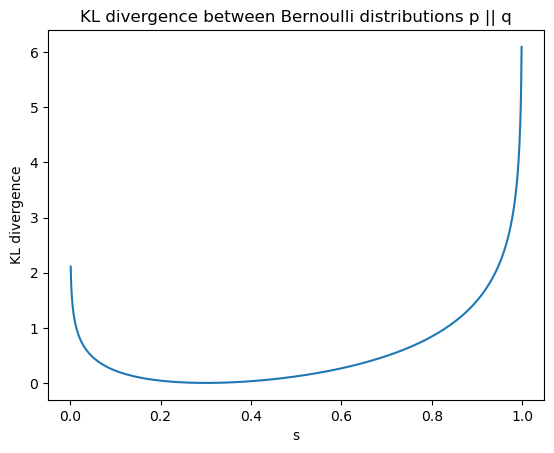

In [42]:
s = np.arange(0.001, 1, 0.001)
KL_pq = [KL_divergence(p, [s_, 1-s_]) for s_ in s]
plt.figure()
plt.plot(s, KL_pq)
plt.xlabel('s')
plt.ylabel('KL divergence')
plt.title('KL divergence between Bernoulli distributions p || q')
plt.show()

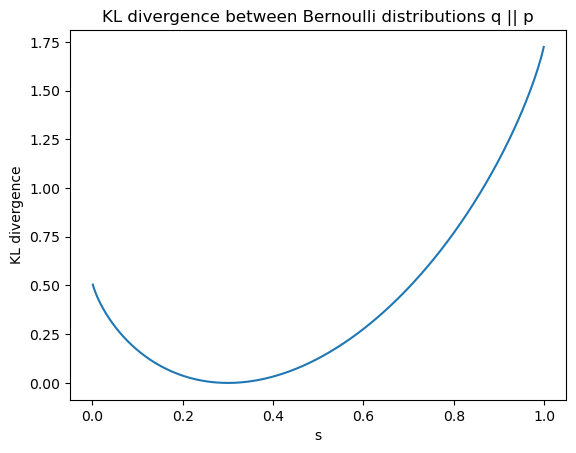

In [43]:
KL_qp = [KL_divergence([s_, 1-s_], p) for s_ in s]
plt.figure()
plt.plot(s, KL_qp)
plt.xlabel('s')
plt.ylabel('KL divergence')
plt.title('KL divergence between Bernoulli distributions q || p')
plt.show()

(ii)

In [44]:
min_kl = min(np.min(KL_pq), np.min(KL_qp))
min_kl

0.0

From the plots as well as above calculation, we can see that the KL divergence is always non-negative.

(iii)

In [45]:
inds = []
for i in range(len(KL_pq)):
    if KL_pq[i] == 0:
        inds.append(s[i])
inds

[0.3]

We can see that KL divergences is zero at only one point, where the two distributions are the same, i.e., $r = s$.

(iv)

In [46]:
norm_hist_left = normalized_hist(img1)
norm_hist_right = normalized_hist(img2)

In [47]:
KL_left_right = KL_divergence(list(norm_hist_left.values()), list(norm_hist_right.values()))
KL_right_left = KL_divergence(list(norm_hist_right.values()), list(norm_hist_left.values()))

In [48]:
print(f"KL divergence for left || right: {KL_left_right}")
print(f"KL divergence for right || left: {KL_right_left}")

KL divergence for left || right: 0.32515092893162284
KL divergence for right || left: 0.3162064867917893


KL divergence is not a good metric for measuring the similarity between two images for the following reasons:  
1. <b>Asymmetry</b>: This property can be problematic when comparing images, as the measure depends on the direction of comparison.
2. <b>Sensitivity to Zero Values</b>: KL divergence is sensitive to zero values in the probability distributions. If one distribution assigns zero probability to a pixel value that the other distribution assigns a non-zero probability, the divergence becomes infinite. This sensitivity can cause instability when comparing images, especially when working with sparse data or where pixel distributions can contain zero values.